# KMEANS聚类分析
## 1.载入库和模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 导入KMeans相关模块
from sklearn import datasets
from sklearn.cluster import KMeans     # KMeans算法
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import preprocessing  # 数据预处理

## 2.生成模拟数据

In [2]:
N = 1500               # 样本数量
centers = 4            # 样本类别数量
n_features = 2         # 特征数量

data, y = sklearn.datasets.make_blobs(
    n_samples = N,
    n_features = n_features,
    centers = centers,
    random_state = 10
) 

In [3]:
data
# 打算用来进行聚类的数据集

array([[ 4.25151798,  6.17225772],
       [ 1.03745836, -5.26870562],
       [-0.66285466, -5.28697222],
       ...,
       [-5.18368479,  3.8668936 ],
       [-0.66382535, -6.4321564 ],
       [ 0.42668408, -6.02920057]])

In [4]:
y
# 聚类的结果（初始化的标签，为了方便对聚类的效果进行评估）

array([1, 2, 2, ..., 3, 2, 2])

In [5]:
data.shape

(1500, 2)

In [6]:
y.shape

(1500,)

## 3.数据理解

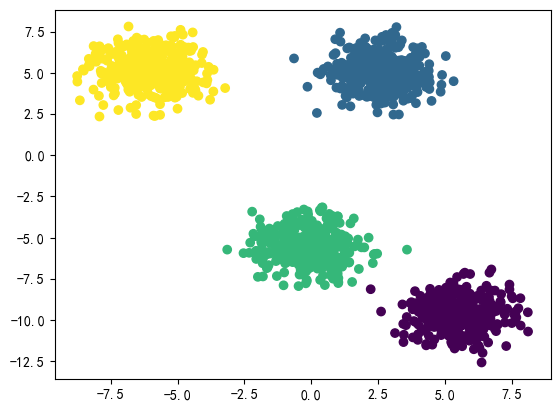

In [7]:
# 使用散点图进行可视化观察
plt.scatter(
    data[:,0],          # 模拟数据的第一个特征（第一列）作为x轴的数据
    data[:,1],          # 模拟数据的第二个特征（第二列）作为y轴的数据
    c = y               # 使用样本的类别作为散点图的色彩区分
)

## 4.KMeans算法

    sklearn.cluster.KMeans(
        n_clusters=8,           # 样本打算聚成多少类，KMeans中的 K 值
        *,
        init='k-means++',         # 初始值的选择方式，k-means++ 是经过优化的算法，random是随机设定
        n_init=10,
        max_iter=300,           # 最大迭代次数
        tol=0.0001,
        verbose=0,
        random_state=None,
        copy_x=True,
        algorithm='auto',
    )

## 5.模型构建

In [8]:
km_model = KMeans(
    n_clusters = 4,    # 将数据聚为4类
    random_state = 28
)
# 聚类中心点的初始值是随机选择的，算法训练的目的是得到最终的聚类中心点坐标

In [9]:
km_model.fit(data, y)

KMeans(n_clusters=4, random_state=28)

KMeans属于非监督算法，训练样本不需要目标变量，因此，是否传入目标变量不影响聚类结果，这里只是遵循fit的习惯写法

## 6.聚类模型的结果

In [10]:
dir(km_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_tol',
 '_transform',
 '_v

In [11]:
print('所有样本到聚类中心点的距离（总距离）：',km_model.inertia_)
print('所有样本到聚类中心点的平均距离：', km_model.inertia_ / N)
print('聚类中心点的位置：\n', km_model.cluster_centers_)
cluster_centers = km_model.cluster_centers_

所有样本到聚类中心点的距离（总距离）： 2877.130452655615
所有样本到聚类中心点的平均距离： 1.9180869684370767
聚类中心点的位置：
 [[ 5.49479518 -9.59701372]
 [-6.04063565  5.17896311]
 [ 2.60786057  5.00654462]
 [-0.09723311 -5.55596773]]


In [12]:
type(cluster_centers)

numpy.ndarray

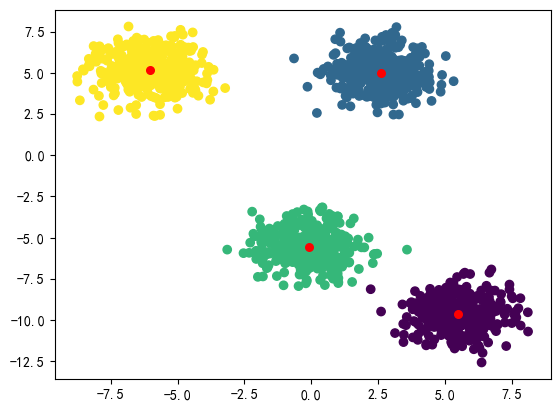

In [13]:
# 将聚类中心点标注到散点图中
# 使用散点图进行可视化观察
plt.scatter(
    data[:,0],          # 模拟数据的第一个特征（第一列）作为x轴的数据
    data[:,1],          # 模拟数据的第二个特征（第二列）作为y轴的数据
    c = y               # 使用样本的类别作为散点图的色彩区分
)

# 使用散点图进行可视化观察聚类中心点的位置
plt.scatter(
    cluster_centers[:,0],          # 聚类中心的第一个维度放在x轴上
    cluster_centers[:,1],          # 聚类中心的第二个维度放在y轴上
    c = 'red',
    s = 30
)

## 7.观察聚类结果和原始类别的差异

In [14]:
pred_y = km_model.predict(data)
# 用构建好的聚类模型对数据进行预测，将原始数据划分为不同的类（给数据打标签）

In [15]:
pred_y.shape

(1500,)

In [16]:
pred_y[:10]

array([2, 3, 3, 2, 1, 1, 3, 0, 3, 0])

In [17]:
y[:10]

array([1, 2, 2, 1, 3, 3, 2, 0, 2, 0])

### 注意：聚类结果（聚类模型的预测结果）和真实类别之间没有联系

通过混淆矩阵观察聚类结果和实际类别的关系

In [18]:
sklearn.metrics.confusion_matrix(pred_y, y)

array([[374,   0,   0,   0],
       [  0,   0,   0, 375],
       [  0, 375,   0,   0],
       [  1,   0, 375,   0]], dtype=int64)

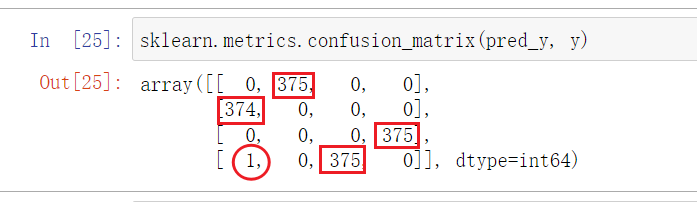

将原始类别和聚类结果放在同一张图上进行观察

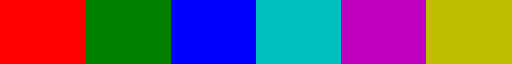

In [19]:
# 构建一个自定义的colormap
import matplotlib as mpl
color_map  = mpl.colors.ListedColormap(list('rgbcmy'))
color_map
# 用指定的颜色字母列表构建自定义的colormap

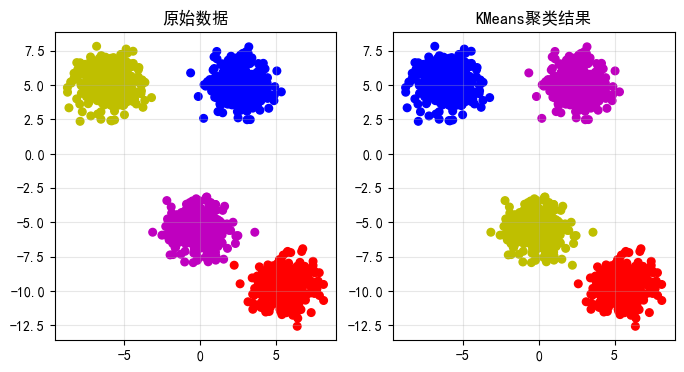

In [20]:
plt.figure(figsize = (8,4))

# 切图
plt.subplot(1, 2, 1)

# 左侧绘制原始数据
plt.scatter(
    data[:,0],
    data[:,1],
    c = y,
    s = 30,
    cmap = color_map
)
plt.title('原始数据')
plt.grid(alpha = 0.3)

# 右侧绘制聚类结果
plt.subplot(1, 2, 2)
plt.scatter(
    data[:,0],
    data[:,1],
    c = pred_y,        # 用聚类结果设置点的色彩
    s = 30,
    cmap = color_map
)
plt.title('KMeans聚类结果')
plt.grid(alpha = 0.3)

# 显示图像，隐藏提示信息
plt.show()

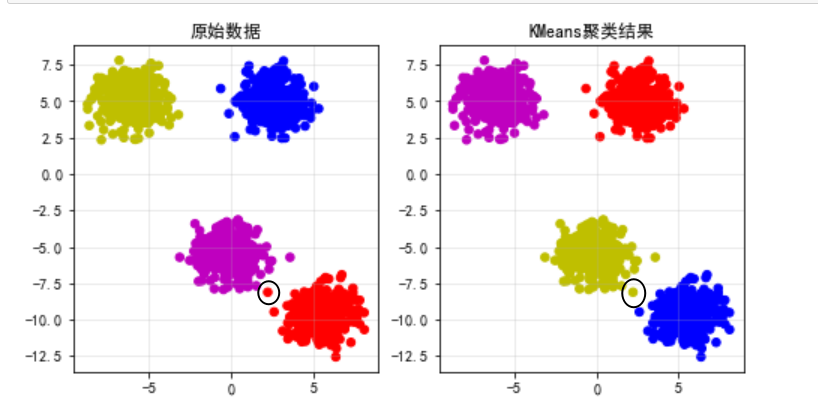